# MNIST convolutional neural networks

* MNIST data를 가지고 **convolutional neural networks**를 만들어보자.
* [`tf.layers`](https://www.tensorflow.org/api_docs/python/tf/layers) API를 가지고 convolutional neural networks를 직접 구현해보자.

### Import modules

In [1]:
"""A very simple MNIST classifier.
"""
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import time
import tensorflow as tf

sess_config = tf.ConfigProto(gpu_options=tf.GPUOptions(allow_growth=True))

np.random.seed(219)
tf.set_random_seed(219)

/Users/shatapy/anaconda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


### Import data

In [2]:
# Load training and eval data from tf.keras
(train_data, train_labels), (test_data, test_labels) = \
    tf.keras.datasets.mnist.load_data()  # what's different with tf.examples.mnist?

train_data = train_data / 255.
train_labels = np.asarray(train_labels, dtype=np.int32)

test_data = test_data / 255.
test_labels = np.asarray(test_labels, dtype=np.int32)

### Show the MNIST

label = 3


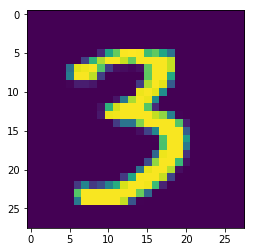

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

index = 10000
print("label = {}".format(train_labels[index]))
plt.imshow(train_data[index])
plt.show()

### Set up dataset with `tf.data`

#### create input pipeline with `tf.data.Dataset`

In [4]:
batch_size = 32

train_dataset = tf.data.Dataset.from_tensor_slices((train_data, train_labels))
train_dataset = train_dataset.shuffle(buffer_size = 10000)
train_dataset = train_dataset.batch(batch_size=batch_size)
print(train_dataset)

test_dataset = tf.data.Dataset.from_tensor_slices((test_data, test_labels))
test_dataset = test_dataset.shuffle(buffer_size=10000)
test_dataset = test_dataset.batch(batch_size=len(test_data))
print(test_dataset)

<BatchDataset shapes: ((?, 28, 28), (?,)), types: (tf.float64, tf.int32)>
<BatchDataset shapes: ((?, 28, 28), (?,)), types: (tf.float64, tf.int32)>


#### Define Iterator

In [5]:
# tf.data.Iterator.from_string_handle의 output_shapes는 default = None이지만 꼭 값을 넣는 게 좋음
handle = tf.placeholder(tf.string, shape=[])
iterator = tf.data.Iterator.from_string_handle(handle,
                                               train_dataset.output_types,
                                               train_dataset.output_shapes)
x, y = iterator.get_next()
x = tf.cast(x, dtype = tf.float32)
y = tf.cast(y, dtype = tf.int32)

### Create the model

In [6]:
def cnn_model_fn(x):
  """Model function for CNN.
  Args:
    x: input images
    mode: boolean whether trainig mode or test mode
    
  Returns:
    logits: unnormalized score funtion
  """
  # Input Layer
  # Reshape X to 4-D tensor: [batch_size, width, height, channels]
  # MNIST images are 28x28 pixels, and have one color channel
  input_layer = tf.reshape(x, [-1, 28, 28, 1])

  # Convolutional Layer #1
  # Computes 32 features using a 5x5 filter with ReLU activation.
  # Padding is added to preserve width and height.
  # Input Tensor Shape: [batch_size, 28, 28, 1]
  # Output Tensor Shape: [batch_size, 28, 28, 32]
  # 여기를 직접 채워 넣으시면 됩니다.
  conv1 = tf.layers.conv2d(inputs=input_layer, filters=32, kernel_size=[5, 5], padding='SAME',
                          activation=tf.nn.relu, name='conv1')
    

  # Pooling Layer #1
  # First max pooling layer with a 2x2 filter and stride of 2
  # Input Tensor Shape: [batch_size, 28, 28, 32]
  # Output Tensor Shape: [batch_size, 14, 14, 32]
  # 여기를 직접 채워 넣으시면 됩니다.
  pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2], strides=2, name='pool1')

  # Convolutional Layer #2
  # Computes 64 features using a 5x5 filter.
  # Padding is added to preserve width and height.
  # Input Tensor Shape: [batch_size, 14, 14, 32]
  # Output Tensor Shape: [batch_size, 14, 14, 64]
  # 여기를 직접 채워 넣으시면 됩니다.
  conv2 = tf.layers.conv2d(inputs=pool1, filters=64, kernel_size=[5, 5], padding='SAME',
                          activation=tf.nn.relu, name='conv2')

  # Pooling Layer #2
  # Second max pooling layer with a 2x2 filter and stride of 2
  # Input Tensor Shape: [batch_size, 14, 14, 64]
  # Output Tensor Shape: [batch_size, 7, 7, 64]
  # 여기를 직접 채워 넣으시면 됩니다.
  pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2], strides=2, name='pool2')

  # Flatten tensor into a batch of vectors
  # Input Tensor Shape: [batch_size, 7, 7, 64]
  # Output Tensor Shape: [batch_size, 7 * 7 * 64]
  # 여기를 직접 채워 넣으시면 됩니다.
#   pool2_flat = tf.reshape(pool2, [-1, 7*7*64])
  pool2_flat = tf.layers.flatten(inputs=pool2, name='pool_flatten')

  # Dense Layer
  # Densely connected layer with 1024 neurons
  # Input Tensor Shape: [batch_size, 7 * 7 * 64]
  # Output Tensor Shape: [batch_size, 1024]
  # 여기를 직접 채워 넣으시면 됩니다.
  dense = tf.layers.dense(pool2_flat, 1024, activation=tf.nn.relu, name='fc1')

  # Add dropout operation; 0.6 probability that element will be kept
  is_training = tf.placeholder(tf.bool)
  # 여기를 직접 채워 넣으시면 됩니다.
  dropout = tf.layers.dropout(dense, 0.6, training=is_training, name='dropout')

  # Logits layer
  # Input Tensor Shape: [batch_size, 1024]
  # Output Tensor Shape: [batch_size, 10]
  # 여기를 직접 채워 넣으시면 됩니다.
  logits = tf.layers.dense(dropout, 10, activation=tf.nn.relu, name='fc2')
  
  return logits, is_training, input_layer

### Build the model

In [7]:
logits, is_training, x_image = cnn_model_fn(x)

### Define loss and optimizer

In [8]:
# 여기를 직접 채워 넣으시면 됩니다.
y_one_hot = tf.one_hot(indices=y, depth=10)
cross_entropy = tf.reduce_mean(tf.losses.softmax_cross_entropy(logits=logits, onehot_labels=y_one_hot))
# tf.losses.softmax_cross_entropy와
# tf.losses.sparse_softmax_cross_entropy의 차이점은?
# reduce_mean 해야되나? 

train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

### Assign `tf.summary.FileWriter`

In [9]:
graph_location = 'graphs/01_mnist_cnn_with_tf_layers'
print('Saving graph to: %s' % graph_location)
train_writer = tf.summary.FileWriter(graph_location)
train_writer.add_graph(tf.get_default_graph())

Saving graph to: graphs/01_mnist_cnn_with_tf_layers


### `tf.summary`

In [10]:
with tf.name_scope('summaries'):
  tf.summary.scalar('loss/cross_entropy', cross_entropy)
  tf.summary.image('images', x_image)
  for var in tf.trainable_variables():
    tf.summary.histogram(var.op.name, var)
  # merge all summaries
  summary_op = tf.summary.merge_all()

### `tf.Session()` and train

In [12]:
sess = tf.Session(config=sess_config)
sess.run(tf.global_variables_initializer())

# train_iterator
train_iterator = train_dataset.make_initializable_iterator()
train_handle = sess.run(train_iterator.string_handle())

# Train
max_epochs = 2
step = 0
for epochs in range(max_epochs):
  # 여기를 직접 채워 넣으시면 됩니다.
  sess.run(train_iterator.initializer)

  start_time = time.time()
  while True:
    try:
      # 여기를 직접 채워 넣으시면 됩니다.
      _, loss = sess.run([train_step, cross_entropy], 
                         feed_dict={handle:train_handle, is_training:True})
      if step % 100 == 0:
        print("step: %d, loss: %g" % (step, loss))
        
        # summary
        # 여기를 직접 채워 넣으시면 됩니다.
        summary_str = sess.run(summary_op,
                              feed_dict={handle:train_handle, is_training:True})
        train_writer.add_summary(summary_str, global_step=step)
        
      step += 1

    except tf.errors.OutOfRangeError:
      print("End of dataset")  # ==> "End of dataset"
      break
      
    print("Epochs: {} Elapsed time: {}".format(epochs, time.time() - start_time))

train_writer.close()
print("training done!")

step: 0, loss: 2.30714
Epochs: 0 Elapsed time: 1.691391944885254
Epochs: 0 Elapsed time: 1.8120617866516113
Epochs: 0 Elapsed time: 1.8779850006103516
Epochs: 0 Elapsed time: 1.945525884628296
Epochs: 0 Elapsed time: 2.0137939453125
Epochs: 0 Elapsed time: 2.0752499103546143
Epochs: 0 Elapsed time: 2.1369810104370117
Epochs: 0 Elapsed time: 2.2123169898986816
Epochs: 0 Elapsed time: 2.2794158458709717
Epochs: 0 Elapsed time: 2.34214186668396
Epochs: 0 Elapsed time: 2.4051198959350586
Epochs: 0 Elapsed time: 2.4774458408355713
Epochs: 0 Elapsed time: 2.539119005203247
Epochs: 0 Elapsed time: 2.6012179851531982
Epochs: 0 Elapsed time: 2.662451982498169
Epochs: 0 Elapsed time: 2.7409768104553223
Epochs: 0 Elapsed time: 2.809471845626831
Epochs: 0 Elapsed time: 2.873351812362671
Epochs: 0 Elapsed time: 2.9351389408111572
Epochs: 0 Elapsed time: 3.0070648193359375
Epochs: 0 Elapsed time: 3.0699219703674316
Epochs: 0 Elapsed time: 3.131917953491211
Epochs: 0 Elapsed time: 3.193563938140869
E

Epochs: 0 Elapsed time: 16.44291090965271
Epochs: 0 Elapsed time: 16.523175954818726
Epochs: 0 Elapsed time: 16.58830690383911
Epochs: 0 Elapsed time: 16.65408682823181
Epochs: 0 Elapsed time: 16.735862970352173
step: 200, loss: 0.521359
Epochs: 0 Elapsed time: 16.9742169380188
Epochs: 0 Elapsed time: 17.0549898147583
Epochs: 0 Elapsed time: 17.120919942855835
Epochs: 0 Elapsed time: 17.185115814208984
Epochs: 0 Elapsed time: 17.26463794708252
Epochs: 0 Elapsed time: 17.341450929641724
Epochs: 0 Elapsed time: 17.420305967330933
Epochs: 0 Elapsed time: 17.490715980529785
Epochs: 0 Elapsed time: 17.553242921829224
Epochs: 0 Elapsed time: 17.6158709526062
Epochs: 0 Elapsed time: 17.68570899963379
Epochs: 0 Elapsed time: 17.749431848526
Epochs: 0 Elapsed time: 17.816515922546387
Epochs: 0 Elapsed time: 17.90949583053589
Epochs: 0 Elapsed time: 18.00660800933838
Epochs: 0 Elapsed time: 18.071016788482666
Epochs: 0 Elapsed time: 18.13687491416931
Epochs: 0 Elapsed time: 18.218338012695312
Ep

Epochs: 0 Elapsed time: 32.26539587974548
Epochs: 0 Elapsed time: 32.34000301361084
Epochs: 0 Elapsed time: 32.40207600593567
Epochs: 0 Elapsed time: 32.4642288684845
Epochs: 0 Elapsed time: 32.53028392791748
Epochs: 0 Elapsed time: 32.59837889671326
Epochs: 0 Elapsed time: 32.710866928100586
Epochs: 0 Elapsed time: 32.82636499404907
Epochs: 0 Elapsed time: 32.92560887336731
Epochs: 0 Elapsed time: 32.99171590805054
Epochs: 0 Elapsed time: 33.05515694618225
step: 400, loss: 0.240989
Epochs: 0 Elapsed time: 33.33781981468201
Epochs: 0 Elapsed time: 33.40682888031006
Epochs: 0 Elapsed time: 33.47262382507324
Epochs: 0 Elapsed time: 33.58632493019104
Epochs: 0 Elapsed time: 33.69856595993042
Epochs: 0 Elapsed time: 33.8116888999939
Epochs: 0 Elapsed time: 33.918853998184204
Epochs: 0 Elapsed time: 33.9854040145874
Epochs: 0 Elapsed time: 34.053459882736206
Epochs: 0 Elapsed time: 34.115362882614136
Epochs: 0 Elapsed time: 34.20213484764099
Epochs: 0 Elapsed time: 34.31553387641907
Epochs:

Epochs: 0 Elapsed time: 47.56216382980347
Epochs: 0 Elapsed time: 47.652079820632935
Epochs: 0 Elapsed time: 47.7315628528595
Epochs: 0 Elapsed time: 47.8240180015564
Epochs: 0 Elapsed time: 47.913848876953125
Epochs: 0 Elapsed time: 47.99055194854736
Epochs: 0 Elapsed time: 48.06156396865845
Epochs: 0 Elapsed time: 48.14242386817932
Epochs: 0 Elapsed time: 48.20526599884033
Epochs: 0 Elapsed time: 48.268879890441895
Epochs: 0 Elapsed time: 48.35433578491211
Epochs: 0 Elapsed time: 48.43221378326416
Epochs: 0 Elapsed time: 48.51364994049072
Epochs: 0 Elapsed time: 48.59399700164795
Epochs: 0 Elapsed time: 48.66725993156433
Epochs: 0 Elapsed time: 48.74503779411316
Epochs: 0 Elapsed time: 48.809382915496826
Epochs: 0 Elapsed time: 48.87173390388489
step: 600, loss: 0.163592
Epochs: 0 Elapsed time: 49.09907293319702
Epochs: 0 Elapsed time: 49.16279697418213
Epochs: 0 Elapsed time: 49.22608184814453
Epochs: 0 Elapsed time: 49.30199384689331
Epochs: 0 Elapsed time: 49.383413791656494
Epoch

Epochs: 0 Elapsed time: 60.78575086593628
Epochs: 0 Elapsed time: 60.84990382194519
Epochs: 0 Elapsed time: 60.912301778793335
Epochs: 0 Elapsed time: 60.97477197647095
Epochs: 0 Elapsed time: 61.043536901474
Epochs: 0 Elapsed time: 61.10607886314392
Epochs: 0 Elapsed time: 61.16729688644409
Epochs: 0 Elapsed time: 61.22827696800232
Epochs: 0 Elapsed time: 61.29605984687805
Epochs: 0 Elapsed time: 61.35801982879639
Epochs: 0 Elapsed time: 61.41930890083313
Epochs: 0 Elapsed time: 61.480193853378296
Epochs: 0 Elapsed time: 61.54994583129883
Epochs: 0 Elapsed time: 61.611407995224
Epochs: 0 Elapsed time: 61.672719955444336
Epochs: 0 Elapsed time: 61.733481884002686
Epochs: 0 Elapsed time: 61.80416178703308
Epochs: 0 Elapsed time: 61.86663293838501
Epochs: 0 Elapsed time: 61.92859482765198
Epochs: 0 Elapsed time: 61.9899799823761
Epochs: 0 Elapsed time: 62.05858397483826
Epochs: 0 Elapsed time: 62.120200872421265
step: 800, loss: 0.202991
Epochs: 0 Elapsed time: 62.34777498245239
Epochs: 

Epochs: 0 Elapsed time: 73.7778549194336
Epochs: 0 Elapsed time: 73.84391188621521
Epochs: 0 Elapsed time: 73.90543794631958
Epochs: 0 Elapsed time: 73.9669759273529
Epochs: 0 Elapsed time: 74.03573989868164
Epochs: 0 Elapsed time: 74.09822082519531
Epochs: 0 Elapsed time: 74.16022801399231
Epochs: 0 Elapsed time: 74.22171998023987
Epochs: 0 Elapsed time: 74.29021501541138
Epochs: 0 Elapsed time: 74.3520929813385
Epochs: 0 Elapsed time: 74.41408085823059
Epochs: 0 Elapsed time: 74.47507500648499
Epochs: 0 Elapsed time: 74.54422879219055
Epochs: 0 Elapsed time: 74.60573482513428
Epochs: 0 Elapsed time: 74.6666088104248
Epochs: 0 Elapsed time: 74.72901582717896
Epochs: 0 Elapsed time: 74.79729700088501
Epochs: 0 Elapsed time: 74.86125779151917
Epochs: 0 Elapsed time: 74.92391681671143
Epochs: 0 Elapsed time: 74.9857439994812
Epochs: 0 Elapsed time: 75.0584568977356
Epochs: 0 Elapsed time: 75.12101197242737
Epochs: 0 Elapsed time: 75.18384099006653
Epochs: 0 Elapsed time: 75.2513079643249

Epochs: 0 Elapsed time: 92.01010990142822
Epochs: 0 Elapsed time: 92.08042192459106
Epochs: 0 Elapsed time: 92.15850687026978
Epochs: 0 Elapsed time: 92.2375328540802
Epochs: 0 Elapsed time: 92.31828689575195
Epochs: 0 Elapsed time: 92.39569282531738
Epochs: 0 Elapsed time: 92.48026299476624
Epochs: 0 Elapsed time: 92.55690383911133
Epochs: 0 Elapsed time: 92.62837886810303
Epochs: 0 Elapsed time: 92.70406198501587
Epochs: 0 Elapsed time: 92.78395700454712
Epochs: 0 Elapsed time: 92.87019085884094
Epochs: 0 Elapsed time: 92.94731378555298
Epochs: 0 Elapsed time: 93.01855778694153
Epochs: 0 Elapsed time: 93.11314678192139
Epochs: 0 Elapsed time: 93.22801899909973
Epochs: 0 Elapsed time: 93.33635783195496
Epochs: 0 Elapsed time: 93.4078278541565
Epochs: 0 Elapsed time: 93.50392985343933
Epochs: 0 Elapsed time: 93.59635901451111
Epochs: 0 Elapsed time: 93.69227290153503
Epochs: 0 Elapsed time: 93.78994584083557
Epochs: 0 Elapsed time: 93.88099884986877
Epochs: 0 Elapsed time: 93.969739913

Epochs: 0 Elapsed time: 107.59777498245239
Epochs: 0 Elapsed time: 107.66632390022278
Epochs: 0 Elapsed time: 107.73297595977783
Epochs: 0 Elapsed time: 107.80650496482849
Epochs: 0 Elapsed time: 107.90670990943909
Epochs: 0 Elapsed time: 108.04331684112549
Epochs: 0 Elapsed time: 108.12098288536072
Epochs: 0 Elapsed time: 108.18916296958923
Epochs: 0 Elapsed time: 108.25730681419373
Epochs: 0 Elapsed time: 108.32638692855835
Epochs: 0 Elapsed time: 108.39569282531738
Epochs: 0 Elapsed time: 108.46434283256531
Epochs: 0 Elapsed time: 108.5314109325409
Epochs: 0 Elapsed time: 108.59972596168518
Epochs: 0 Elapsed time: 108.67811489105225
Epochs: 0 Elapsed time: 108.77477478981018
Epochs: 0 Elapsed time: 108.856271982193
Epochs: 0 Elapsed time: 108.93288588523865
Epochs: 0 Elapsed time: 109.00335597991943
Epochs: 0 Elapsed time: 109.1050717830658
Epochs: 0 Elapsed time: 109.20956182479858
Epochs: 0 Elapsed time: 109.29727983474731
Epochs: 0 Elapsed time: 109.38120889663696
Epochs: 0 Elaps

Epochs: 0 Elapsed time: 120.54515600204468
Epochs: 0 Elapsed time: 120.61682987213135
Epochs: 0 Elapsed time: 120.68617701530457
Epochs: 0 Elapsed time: 120.7557098865509
Epochs: 0 Elapsed time: 120.82031679153442
Epochs: 0 Elapsed time: 120.88425993919373
Epochs: 0 Elapsed time: 120.94702792167664
Epochs: 0 Elapsed time: 121.00962996482849
Epochs: 0 Elapsed time: 121.07176685333252
Epochs: 0 Elapsed time: 121.13271594047546
Epochs: 0 Elapsed time: 121.19428300857544
Epochs: 0 Elapsed time: 121.25643587112427
Epochs: 0 Elapsed time: 121.31841087341309
Epochs: 0 Elapsed time: 121.37899994850159
Epochs: 0 Elapsed time: 121.43933200836182
Epochs: 0 Elapsed time: 121.50186896324158
Epochs: 0 Elapsed time: 121.56778192520142
Epochs: 0 Elapsed time: 121.63786292076111
Epochs: 0 Elapsed time: 121.70737600326538
Epochs: 0 Elapsed time: 121.77332091331482
Epochs: 0 Elapsed time: 121.83679294586182
Epochs: 0 Elapsed time: 121.90083479881287
Epochs: 0 Elapsed time: 121.96450781822205
Epochs: 0 El

Epochs: 0 Elapsed time: 139.05926299095154
Epochs: 0 Elapsed time: 139.14116191864014
Epochs: 0 Elapsed time: 139.20783686637878
Epochs: 0 Elapsed time: 139.27180194854736
Epochs: 0 Elapsed time: 139.34904599189758
Epochs: 0 Elapsed time: 139.43160200119019
Epochs: 0 Elapsed time: 139.51561379432678
Epochs: 0 Elapsed time: 139.59293484687805
Epochs: 0 Elapsed time: 139.68279790878296
Epochs: 0 Elapsed time: 139.7569499015808
Epochs: 0 Elapsed time: 139.82124280929565
Epochs: 0 Elapsed time: 139.8887598514557
Epochs: 0 Elapsed time: 139.952241897583
Epochs: 0 Elapsed time: 140.02774691581726
Epochs: 0 Elapsed time: 140.1436858177185
Epochs: 0 Elapsed time: 140.24461793899536
Epochs: 0 Elapsed time: 140.33883595466614
Epochs: 0 Elapsed time: 140.41231894493103
Epochs: 0 Elapsed time: 140.48591589927673
Epochs: 0 Elapsed time: 140.54880595207214
Epochs: 0 Elapsed time: 140.61271286010742
Epochs: 0 Elapsed time: 140.7071099281311
Epochs: 0 Elapsed time: 140.79119086265564
Epochs: 0 Elapsed

Epochs: 1 Elapsed time: 9.12574315071106
Epochs: 1 Elapsed time: 9.224828958511353
Epochs: 1 Elapsed time: 9.326503038406372
Epochs: 1 Elapsed time: 9.434416055679321
Epochs: 1 Elapsed time: 9.542685985565186
Epochs: 1 Elapsed time: 9.630237102508545
Epochs: 1 Elapsed time: 9.745651006698608
Epochs: 1 Elapsed time: 9.886232137680054
Epochs: 1 Elapsed time: 9.996119976043701
Epochs: 1 Elapsed time: 10.063092947006226
Epochs: 1 Elapsed time: 10.16083812713623
Epochs: 1 Elapsed time: 10.27124309539795
Epochs: 1 Elapsed time: 10.376462936401367
Epochs: 1 Elapsed time: 10.48626708984375
Epochs: 1 Elapsed time: 10.556231021881104
Epochs: 1 Elapsed time: 10.62878704071045
Epochs: 1 Elapsed time: 10.742838144302368
Epochs: 1 Elapsed time: 10.8544340133667
Epochs: 1 Elapsed time: 10.925168991088867
Epochs: 1 Elapsed time: 10.9894540309906
Epochs: 1 Elapsed time: 11.06103515625
Epochs: 1 Elapsed time: 11.191208124160767
Epochs: 1 Elapsed time: 11.28085708618164
Epochs: 1 Elapsed time: 11.3835339

Epochs: 1 Elapsed time: 25.009451150894165
Epochs: 1 Elapsed time: 25.07474708557129
Epochs: 1 Elapsed time: 25.13778305053711
Epochs: 1 Elapsed time: 25.198729038238525
Epochs: 1 Elapsed time: 25.26779007911682
Epochs: 1 Elapsed time: 25.329617977142334
Epochs: 1 Elapsed time: 25.390411138534546
Epochs: 1 Elapsed time: 25.451550006866455
Epochs: 1 Elapsed time: 25.519322156906128
Epochs: 1 Elapsed time: 25.579995155334473
Epochs: 1 Elapsed time: 25.641370058059692
Epochs: 1 Elapsed time: 25.70270013809204
Epochs: 1 Elapsed time: 25.77544093132019
Epochs: 1 Elapsed time: 25.837810039520264
Epochs: 1 Elapsed time: 25.899353981018066
Epochs: 1 Elapsed time: 25.960530996322632
Epochs: 1 Elapsed time: 26.032546997070312
Epochs: 1 Elapsed time: 26.09486699104309
Epochs: 1 Elapsed time: 26.155091047286987
Epochs: 1 Elapsed time: 26.217190980911255
Epochs: 1 Elapsed time: 26.286656141281128
Epochs: 1 Elapsed time: 26.347970962524414
Epochs: 1 Elapsed time: 26.409909963607788
Epochs: 1 Elapsed

Epochs: 1 Elapsed time: 38.85859704017639
Epochs: 1 Elapsed time: 38.932049036026
Epochs: 1 Elapsed time: 38.99631214141846
Epochs: 1 Elapsed time: 39.07918906211853
Epochs: 1 Elapsed time: 39.148189067840576
Epochs: 1 Elapsed time: 39.21287393569946
Epochs: 1 Elapsed time: 39.27769899368286
Epochs: 1 Elapsed time: 39.34930109977722
Epochs: 1 Elapsed time: 39.41321110725403
Epochs: 1 Elapsed time: 39.476043939590454
Epochs: 1 Elapsed time: 39.540075063705444
Epochs: 1 Elapsed time: 39.61010503768921
Epochs: 1 Elapsed time: 39.67291808128357
Epochs: 1 Elapsed time: 39.73450708389282
Epochs: 1 Elapsed time: 39.79688906669617
Epochs: 1 Elapsed time: 39.8663330078125
Epochs: 1 Elapsed time: 39.928390979766846
Epochs: 1 Elapsed time: 39.99077296257019
Epochs: 1 Elapsed time: 40.052310943603516
Epochs: 1 Elapsed time: 40.120672941207886
Epochs: 1 Elapsed time: 40.182153940200806
Epochs: 1 Elapsed time: 40.24326705932617
Epochs: 1 Elapsed time: 40.30447793006897
Epochs: 1 Elapsed time: 40.373

Epochs: 1 Elapsed time: 52.34169912338257
Epochs: 1 Elapsed time: 52.40531897544861
Epochs: 1 Elapsed time: 52.46644711494446
Epochs: 1 Elapsed time: 52.52702713012695
Epochs: 1 Elapsed time: 52.5939199924469
Epochs: 1 Elapsed time: 52.65710115432739
Epochs: 1 Elapsed time: 52.71741008758545
Epochs: 1 Elapsed time: 52.77897095680237
Epochs: 1 Elapsed time: 52.845726013183594
Epochs: 1 Elapsed time: 52.90744709968567
Epochs: 1 Elapsed time: 52.968738079071045
Epochs: 1 Elapsed time: 53.03012013435364
Epochs: 1 Elapsed time: 53.097702980041504
Epochs: 1 Elapsed time: 53.1590530872345
Epochs: 1 Elapsed time: 53.220476150512695
Epochs: 1 Elapsed time: 53.28314399719238
Epochs: 1 Elapsed time: 53.35171413421631
Epochs: 1 Elapsed time: 53.41493797302246
Epochs: 1 Elapsed time: 53.476810932159424
Epochs: 1 Elapsed time: 53.53833293914795
Epochs: 1 Elapsed time: 53.60620403289795
Epochs: 1 Elapsed time: 53.66876196861267
Epochs: 1 Elapsed time: 53.73154592514038
Epochs: 1 Elapsed time: 53.7934

Epochs: 1 Elapsed time: 65.3677909374237
Epochs: 1 Elapsed time: 65.43250012397766
Epochs: 1 Elapsed time: 65.49488115310669
Epochs: 1 Elapsed time: 65.55852794647217
Epochs: 1 Elapsed time: 65.63070511817932
Epochs: 1 Elapsed time: 65.69369792938232
Epochs: 1 Elapsed time: 65.7578661441803
Epochs: 1 Elapsed time: 65.82189393043518
Epochs: 1 Elapsed time: 65.89055514335632
Epochs: 1 Elapsed time: 65.95380210876465
Epochs: 1 Elapsed time: 66.01803493499756
Epochs: 1 Elapsed time: 66.08137392997742
Epochs: 1 Elapsed time: 66.15258407592773
Epochs: 1 Elapsed time: 66.21859502792358
Epochs: 1 Elapsed time: 66.28343200683594
Epochs: 1 Elapsed time: 66.34578895568848
Epochs: 1 Elapsed time: 66.4147961139679
Epochs: 1 Elapsed time: 66.47830510139465
Epochs: 1 Elapsed time: 66.53929209709167
Epochs: 1 Elapsed time: 66.60091304779053
Epochs: 1 Elapsed time: 66.67260193824768
Epochs: 1 Elapsed time: 66.7370879650116
Epochs: 1 Elapsed time: 66.79871416091919
Epochs: 1 Elapsed time: 66.86115193367

Epochs: 1 Elapsed time: 78.56371402740479
Epochs: 1 Elapsed time: 78.62520003318787
Epochs: 1 Elapsed time: 78.68681406974792
Epochs: 1 Elapsed time: 78.74868202209473
Epochs: 1 Elapsed time: 78.81875109672546
Epochs: 1 Elapsed time: 78.88311195373535
Epochs: 1 Elapsed time: 78.9442310333252
Epochs: 1 Elapsed time: 79.00674414634705
Epochs: 1 Elapsed time: 79.07557702064514
Epochs: 1 Elapsed time: 79.1370439529419
Epochs: 1 Elapsed time: 79.19948410987854
Epochs: 1 Elapsed time: 79.26205515861511
Epochs: 1 Elapsed time: 79.33112597465515
Epochs: 1 Elapsed time: 79.39274501800537
Epochs: 1 Elapsed time: 79.4547700881958
Epochs: 1 Elapsed time: 79.5167920589447
Epochs: 1 Elapsed time: 79.58393692970276
Epochs: 1 Elapsed time: 79.6455500125885
Epochs: 1 Elapsed time: 79.7069640159607
Epochs: 1 Elapsed time: 79.77342009544373
Epochs: 1 Elapsed time: 79.85873007774353
Epochs: 1 Elapsed time: 79.92020511627197
Epochs: 1 Elapsed time: 79.98158597946167
Epochs: 1 Elapsed time: 80.041659116745


Epochs: 1 Elapsed time: 91.41277003288269
Epochs: 1 Elapsed time: 91.47559404373169
Epochs: 1 Elapsed time: 91.53767514228821
Epochs: 1 Elapsed time: 91.59905195236206
Epochs: 1 Elapsed time: 91.66827392578125
Epochs: 1 Elapsed time: 91.73881316184998
Epochs: 1 Elapsed time: 91.81392407417297
Epochs: 1 Elapsed time: 91.89429116249084
Epochs: 1 Elapsed time: 91.95774102210999
Epochs: 1 Elapsed time: 92.0188410282135
Epochs: 1 Elapsed time: 92.08080315589905
Epochs: 1 Elapsed time: 92.14798998832703
Epochs: 1 Elapsed time: 92.2093620300293
Epochs: 1 Elapsed time: 92.27076196670532
Epochs: 1 Elapsed time: 92.33215999603271
Epochs: 1 Elapsed time: 92.40089011192322
Epochs: 1 Elapsed time: 92.46237301826477
Epochs: 1 Elapsed time: 92.5249559879303
Epochs: 1 Elapsed time: 92.58686709403992
Epochs: 1 Elapsed time: 92.65459609031677
Epochs: 1 Elapsed time: 92.71552109718323
Epochs: 1 Elapsed time: 92.78029894828796
Epochs: 1 Elapsed time: 92.84078192710876
Epochs: 1 Elapsed time: 92.9073691368

Epochs: 1 Elapsed time: 104.49612498283386
Epochs: 1 Elapsed time: 104.56091499328613
Epochs: 1 Elapsed time: 104.62274312973022
Epochs: 1 Elapsed time: 104.68394303321838
Epochs: 1 Elapsed time: 104.75434112548828
Epochs: 1 Elapsed time: 104.81624794006348
Epochs: 1 Elapsed time: 104.87828397750854
Epochs: 1 Elapsed time: 104.93925404548645
Epochs: 1 Elapsed time: 105.00706100463867
Epochs: 1 Elapsed time: 105.06852698326111
Epochs: 1 Elapsed time: 105.13140106201172
Epochs: 1 Elapsed time: 105.19290709495544
Epochs: 1 Elapsed time: 105.26041507720947
Epochs: 1 Elapsed time: 105.32281708717346
Epochs: 1 Elapsed time: 105.3840000629425
Epochs: 1 Elapsed time: 105.44465112686157
Epochs: 1 Elapsed time: 105.51221799850464
Epochs: 1 Elapsed time: 105.5731430053711
Epochs: 1 Elapsed time: 105.63653492927551
Epochs: 1 Elapsed time: 105.69847106933594
Epochs: 1 Elapsed time: 105.76903796195984
Epochs: 1 Elapsed time: 105.83145499229431
Epochs: 1 Elapsed time: 105.89261507987976
Epochs: 1 Ela

Epochs: 1 Elapsed time: 117.11546802520752
Epochs: 1 Elapsed time: 117.18288803100586
Epochs: 1 Elapsed time: 117.2487621307373
Epochs: 1 Elapsed time: 117.31634211540222
Epochs: 1 Elapsed time: 117.38690114021301
Epochs: 1 Elapsed time: 117.44978594779968
Epochs: 1 Elapsed time: 117.51071000099182
Epochs: 1 Elapsed time: 117.57205414772034
Epochs: 1 Elapsed time: 117.64120101928711
Epochs: 1 Elapsed time: 117.70332598686218
Epochs: 1 Elapsed time: 117.76709508895874
Epochs: 1 Elapsed time: 117.82813906669617
Epochs: 1 Elapsed time: 117.89636707305908
Epochs: 1 Elapsed time: 117.95745611190796
Epochs: 1 Elapsed time: 118.01912307739258
Epochs: 1 Elapsed time: 118.0805070400238
Epochs: 1 Elapsed time: 118.1494369506836
Epochs: 1 Elapsed time: 118.21069192886353
Epochs: 1 Elapsed time: 118.27277302742004
Epochs: 1 Elapsed time: 118.33460402488708
Epochs: 1 Elapsed time: 118.40269899368286
Epochs: 1 Elapsed time: 118.46443200111389
Epochs: 1 Elapsed time: 118.52721095085144
Epochs: 1 Elap

Epochs: 1 Elapsed time: 129.5897560119629
Epochs: 1 Elapsed time: 129.65315198898315
Epochs: 1 Elapsed time: 129.71609115600586
Epochs: 1 Elapsed time: 129.77890396118164
Epochs: 1 Elapsed time: 129.8492660522461
Epochs: 1 Elapsed time: 129.91134905815125
Epochs: 1 Elapsed time: 129.9730839729309
Epochs: 1 Elapsed time: 130.03446412086487
step: 3700, loss: 0.0317794
Epochs: 1 Elapsed time: 130.2697639465332
Epochs: 1 Elapsed time: 130.3370270729065
Epochs: 1 Elapsed time: 130.40130496025085
Epochs: 1 Elapsed time: 130.46365213394165
Epochs: 1 Elapsed time: 130.52443408966064
Epochs: 1 Elapsed time: 130.59239315986633
Epochs: 1 Elapsed time: 130.65364408493042
Epochs: 1 Elapsed time: 130.71425414085388
Epochs: 1 Elapsed time: 130.7771179676056
Epochs: 1 Elapsed time: 130.84498500823975
Epochs: 1 Elapsed time: 130.906023979187
Epochs: 1 Elapsed time: 130.96735310554504
End of dataset
training done!


In [14]:
test_iterator = test_dataset.make_initializable_iterator()
test_handle = sess.run(test_iterator.string_handle())
sess.run(test_iterator.initializer)

In [15]:
#### `tf.metrics.accuracy` 사용법을 알아오세요.
accuracy, acc_op = tf.metrics.accuracy(labels=y, predictions=tf.argmax(logits, 1), name='accuracy')
sess.run(tf.local_variables_initializer())

sess.run(acc_op, feed_dict={handle: test_handle, is_training: False})
print("test accuracy:", sess.run(accuracy, feed_dict={handle: test_handle, is_training: False}))

test accuracy: 0.9837


### Print results

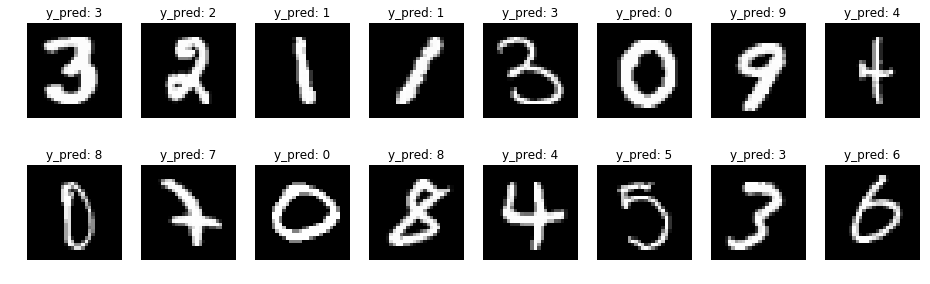

In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

test_batch_size = 16
batch_index = np.random.choice(len(test_data), size=test_batch_size, replace=False)
batch_xs = test_data[batch_index]
y_pred = sess.run(logits, feed_dict={x: batch_xs, is_training: False})

fig = plt.figure(figsize=(16, 10))
for i, (px, py) in enumerate(zip(batch_xs, y_pred)):
  p = fig.add_subplot(4, 8, i+1)
  p.set_title("y_pred: {}".format(np.argmax(py)))
  p.imshow(px.reshape(28, 28), cmap='gray')
  p.axis('off')